In [66]:
import pandas as pd 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import nltk 
from wordcloud import WordCloud
import string
from collections import Counter
from nltk.corpus import stopwords
from transformers import BertTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
df = pd.read_csv('Data/BA_reviews.csv', index_col='Unnamed: 0')
df.head()

,reviews
0,✅ Trip Verified | Very impressed with BA. Chec...
1,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
2,Not Verified | I flew from Malaga via LHR to...
3,✅ Trip Verified | Milan to Miami return via L...
4,✅ Trip Verified | BA created a new low-cost s...


In [41]:
# remove the ✅ from all the text 

emoji = r'[✅\|]'

df['reviews'] = df['reviews'].apply(lambda x: re.sub(emoji, '',x))
df.head()

,reviews
0,Trip Verified Very impressed with BA. Check ...
1,"Trip Verified LHR - SFO, LAS - LGW August 2..."
2,Not Verified I flew from Malaga via LHR to ...
3,Trip Verified Milan to Miami return via Lon...
4,Trip Verified BA created a new low-cost sub...


### Data Cleaning

In [42]:
# converting to lowercase, removing punctuations and special characters, tokenizing text

df['reviews'] = df['reviews'].apply(lambda x: x.lower()).apply(lambda x: x.replace('[^a-zA-Z0-9\s]', '')).apply(lambda x: nltk.word_tokenize(x))


# remove stop words

stop_words = set(stopwords.words('english'))

df['reviews'] = df['reviews'].apply(lambda x: [word for word in x if word not in stop_words])

df.head()

,reviews
0,"[trip, verified, impressed, ba, ., check, onli..."
1,"[trip, verified, lhr, -, sfo, ,, las, -, lgw, ..."
2,"[verified, flew, malaga, via, lhr, boston, 4th..."
3,"[trip, verified, milan, miami, return, via, lo..."
4,"[trip, verified, ba, created, new, low-cost, s..."


### Sentiment Analysis

In [43]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
	compound_score = sia.polarity_scores(' '.join(text))['compound']
	if compound_score >= 0.05:
		return 'positive'
	elif compound_score <= -0.05:
		return 'negative'
	else:
		return 'neutral'

df['sentiment'] = df['reviews'].apply(analyze_sentiment)

df.head()

,reviews,sentiment
0,"[trip, verified, impressed, ba, ., check, onli...",positive
1,"[trip, verified, lhr, -, sfo, ,, las, -, lgw, ...",positive
2,"[verified, flew, malaga, via, lhr, boston, 4th...",negative
3,"[trip, verified, milan, miami, return, via, lo...",negative
4,"[trip, verified, ba, created, new, low-cost, s...",positive


### Word Frequency

In [46]:
def calculate_word_frequency(reviews):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    word_freq = Counter()
    for review in reviews:
        for text in review:
            tokens = tokenizer.tokenize(text)
            word_freq.update(token for token in tokens if token.isalpha())
    return word_freq

word_freq = calculate_word_frequency(df['reviews'])

common_words = word_freq.most_common(10)

common_words

[('flight', 1942),
 ('ba', 1311),
 ('verified', 1004),
 ('trip', 887),
 ('service', 732),
 ('time', 535),
 ('london', 522),
 ('seat', 458),
 ('crew', 448),
 ('class', 445)]

### Generate visualizations

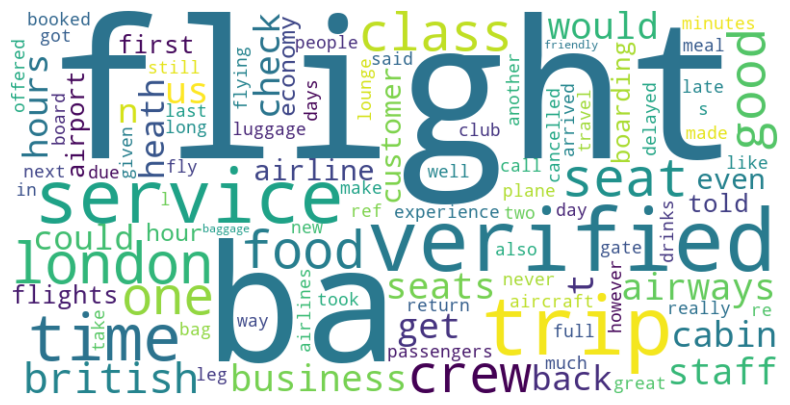

In [49]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

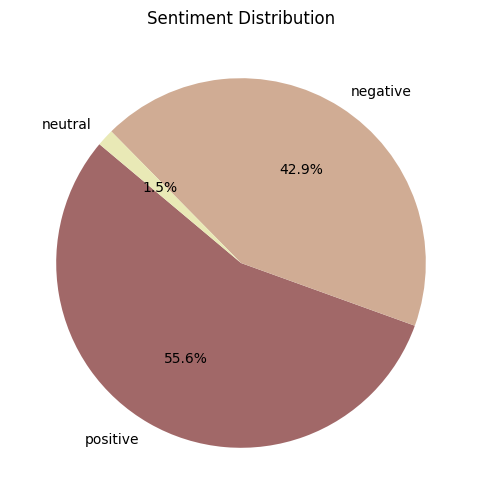

In [73]:
sentiment_counts = df['sentiment'].value_counts()

viridis_palette = sns.color_palette("pink", len(sentiment_counts))

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=viridis_palette, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()